# VICTOR FINAL PROJECT (DATA SCIENCE - COHORT 16)
## Analysis on supermarket sales performance and understand what drives revenue.
- This study investigates sales performance in a supermarket business to identify key factors that influence revenue and provide data-driven insights for decision-making.
### Tools: Python. Pandas, Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv("supermarket_sales.csv")

In [3]:
sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [122]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [124]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [126]:
sales_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')

In [8]:
sales_df.duplicated().sum()

np.int64(0)

In [129]:
round((sales_df.isnull().sum()/sales_df.shape[0]) *100,2)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
Month                      0.0
dtype: float64

In [12]:
cat_col = [col for col in sales_df.columns if sales_df[col].dtype == "object"]
print("Categorical Columns:", cat_col)

Categorical columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [13]:
num_cols = [col for col in sales_df.columns if sales_df[col].dtype != "object"]
print("Numerical Columns:", num_cols)

Numerical Columns: ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


# overall sales performance of the supermarket

In [21]:
total_sales = sales_df['Total'].sum()
avg_sale = round(sales_df['Total'].mean(), 2)
total_sales

np.float64(322966.749)

In [22]:
avg_sale

np.float64(322.97)

### sales by branch

In [24]:
sales_by_branch = sales_df.groupby('Branch')['Total'].sum()

In [25]:
sales_by_branch

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

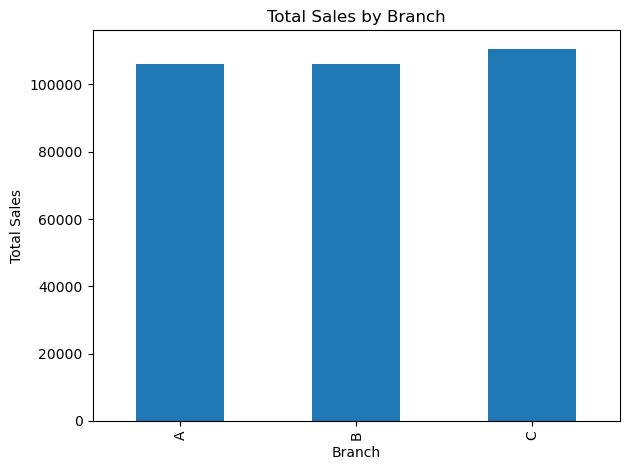

In [135]:
sales_by_branch.plot(kind='bar')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig("sales_by_branch.png")
plt.show()

Branch C has the highest total sales, slightly outperforming Branches A and B, which have almost equal performance.

### Sales by product

In [145]:
sales_by_product = sales_df.groupby('Product line')['Total'].sum().sort_values(ascending = False)

In [146]:
sales_by_product

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

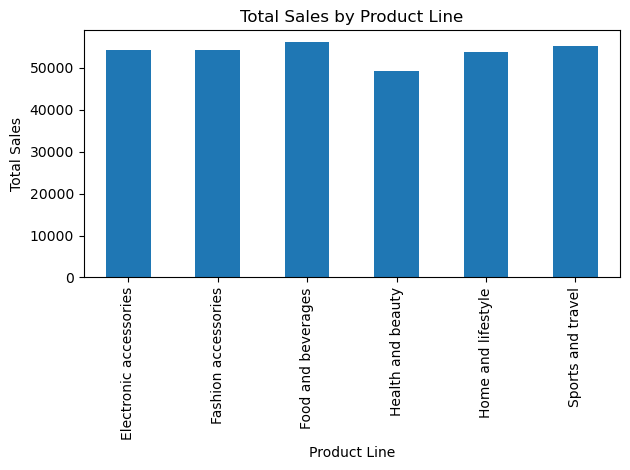

In [39]:
plt.figure()
sales_by_product.plot(kind='bar')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Sales change over time

In [52]:
# Convert Date to datetime format
# Extract month from the date
# Calculate total sales per month
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month_name()#.dt.month
sales_by_month = sales_df.groupby('Month')['Total'].sum().reindex(['January', 'February', 'March'])


In [53]:
sales_by_month

Month
January     116291.868
February     97219.374
March       109455.507
Name: Total, dtype: float64

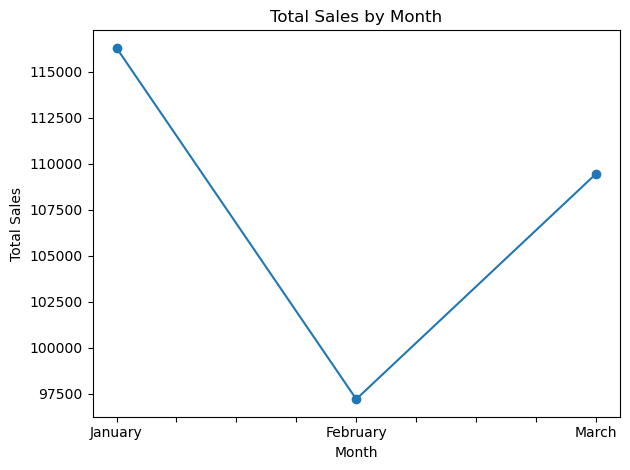

In [150]:
plt.figure()
sales_by_month.plot(kind='line', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig("sales_by_month.png")
plt.show()

Sales were highest in January, dropped in February, and rose again in March. This suggests that customer demand fluctuates over time rather than staying constant.Possible reasons could be that January may have had post-holiday shopping, February is typically a slower retail month and March may reflect renewed demand (just saying).

### Customer Behaviour Analysis

In [114]:
customer_sales = sales_df.groupby('Customer type')['Total'].sum()
customer_sales

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

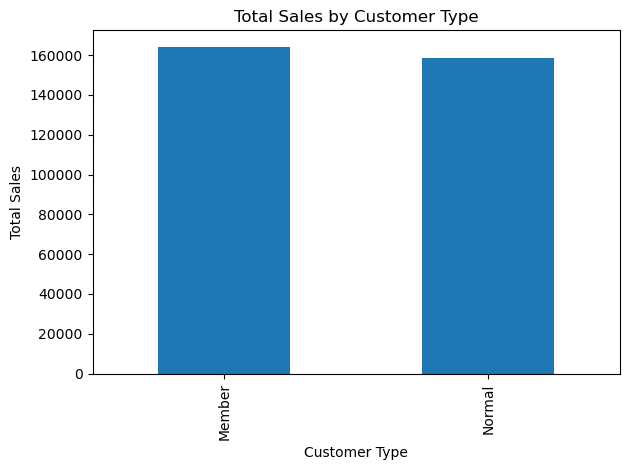

In [140]:
customer_sales.plot(kind='bar')
plt.title("Total Sales by Customer Type")
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig("customer_sales.png")
plt.show()

### Payment Method Analysis

In [79]:
payment_sales = sales_df.groupby('Payment')['Total'].sum()
payment_sales

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

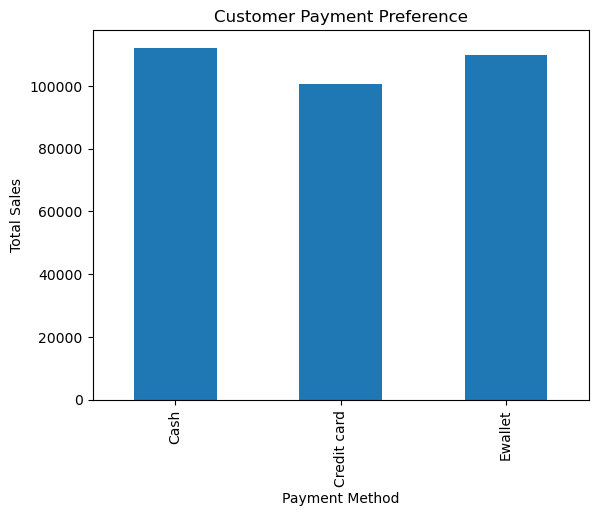

In [141]:
payment_sales.plot(kind='bar')
plt.title("Customer Payment Preference")
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.savefig("payment_sales.png")
plt.show()

### Revenue on Products by Branch

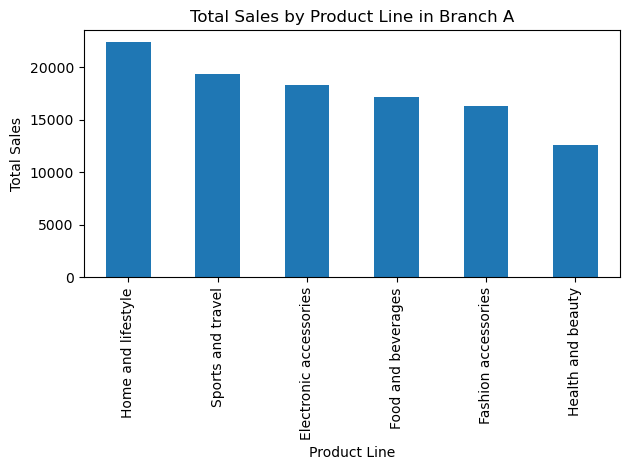

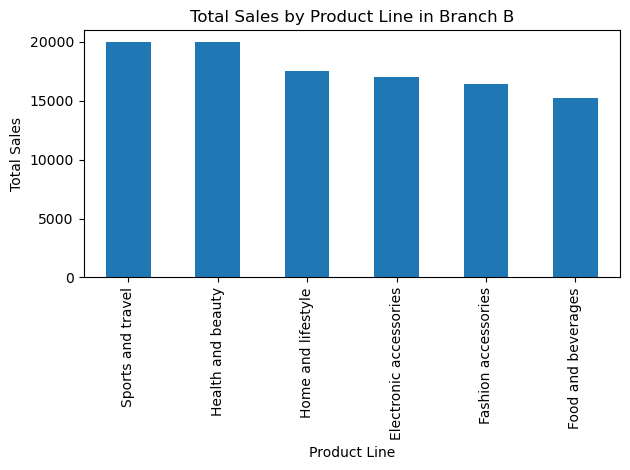

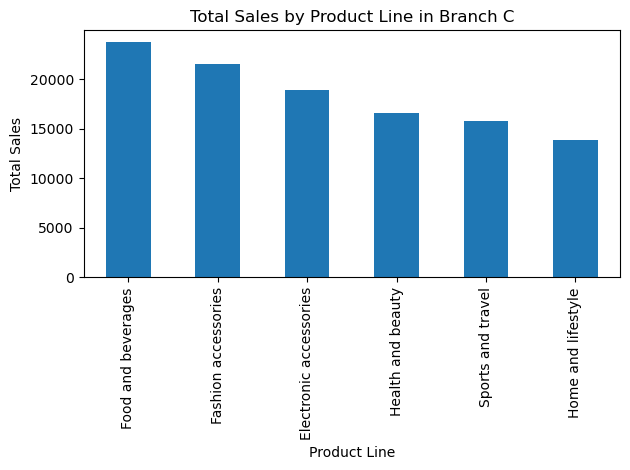

In [142]:
# Create total sales table by Branch and Product line
branch_product = (
    sales_df.groupby(['Branch', 'Product line'])['Total']
      .sum()
      .reset_index()
)

# Get unique branches
branches = sales_df['Branch'].unique()

# Loop through each branch and plot separately
for branch in sorted(branches):

    subset = branch_product[branch_product['Branch'] == branch]
    subset = subset.set_index('Product line')['Total']
    subset = subset.sort_values(ascending=False)

    plt.figure()
    subset.plot(kind='bar')
    plt.title(f'Total Sales by Product Line in Branch {branch}')
    plt.xlabel('Product Line')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.savefig("branch_product.png")
    plt.show()


In [99]:
branch_product = sales_df.groupby(['Branch', 'Product line'])['Total'].sum()
branch_product

Branch  Product line          
A       Electronic accessories    18317.1135
        Fashion accessories       16332.5085
        Food and beverages        17163.1005
        Health and beauty         12597.7530
        Home and lifestyle        22417.1955
        Sports and travel         19372.6995
B       Electronic accessories    17051.4435
        Fashion accessories       16413.3165
        Food and beverages        15214.8885
        Health and beauty         19980.6600
        Home and lifestyle        17549.1645
        Sports and travel         19988.1990
C       Electronic accessories    18968.9745
        Fashion accessories       21560.0700
        Food and beverages        23766.8550
        Health and beauty         16615.3260
        Home and lifestyle        13895.5530
        Sports and travel         15761.9280
Name: Total, dtype: float64

In [131]:
multi_summary = (
    sales_df.groupby(['Branch','Product line','Customer type'])['Total']
      .mean()
      .reset_index()
)
multi_summary

,Branch,Product line,Customer type,Total
0,A,Electronic accessories,Member,295.022226
1,A,Electronic accessories,Normal,316.256017
2,A,Fashion accessories,Member,315.571773
3,A,Fashion accessories,Normal,323.790672
4,A,Food and beverages,Member,306.105414
5,A,Food and beverages,Normal,285.725638
6,A,Health and beauty,Member,292.677000
7,A,Health and beauty,Normal,246.354360
8,A,Home and lifestyle,Member,369.302912
9,A,Home and lifestyle,Normal,318.093435


## Quantity vs Total 

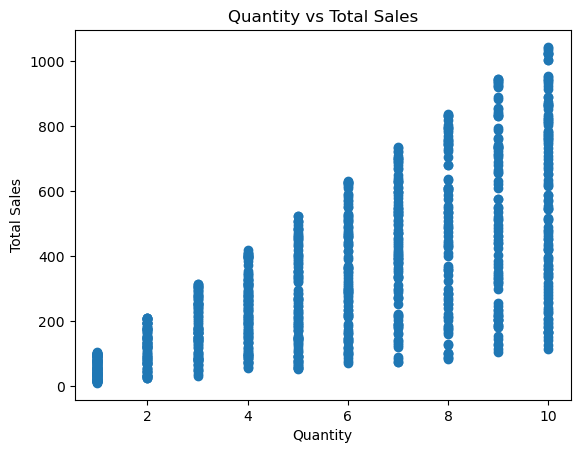

In [143]:
plt.figure()
plt.scatter(sales_df['Quantity'], sales_df['Total'])
plt.title('Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.savefig("multi_summary.png")
plt.show()


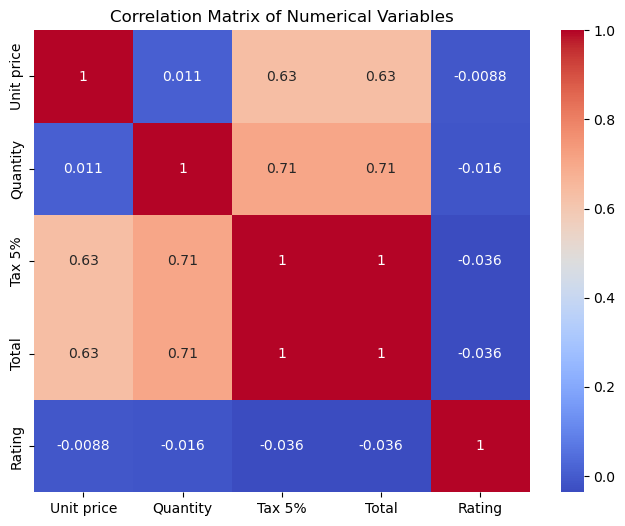

<Figure size 640x480 with 0 Axes>

In [149]:
#import seaborn as sns
#import matplotlib.pyplot as plt

numeric_df = sales_df[['Unit price','Quantity','Tax 5%','Total','Rating']]

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()
plt.savefig("numeric_df.png")

# What the Data Reveals
- Top Performance Drivers: It identifies which branches (e.g., Branch C) and product categories (e.g., Food & Beverages) are the primary engines of growth. This helps businesses understand where their core strengths lie.

- The "Bulk Purchase" Effect: Statistical analysis (like the scatter plots and IQR method mentioned in the slides) distinguishes between everyday sales and high-value "outliers." These outliers represent authentic bulk-buying behavior, which is a key revenue segment.

- Membership Value: The data highlights a clear gap in spending between registered members and normal customers, proving that loyalty programs directly translate into higher transaction totals.

- Payment Preferences: It tracks how customers prefer to pay, showing whether digital wallets, cash, or credit cards dominate different regions or product lines.

# Why It Is Relevant to Today’s Retail Business

- Inventory Optimization & Waste Reduction: With rising logistics costs and a focus on sustainability, retailers use sales trends to predict demand accurately. This ensures high-demand items (like Food & Beverages) are always in stock while reducing the waste of slower-moving products.

- Navigating Value-Seeking Trends: Consumers are increasingly "value-seeking." By analyzing which products are often bought in bulk (the outliers), retailers can design better bundle deals or "private label" strategies that offer the value customers are looking for without eroding profit margins.

Data-Driven Decision Making: Relying on "gut instinct" is high-risk. Companies that master data analytics—using tools like Python and Power BI—react faster to market shifts, identify pricing inefficiencies, and ultimately achieve higher profitability.